In [59]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.19.0
1.26.4


In [60]:
from PIL import Image 
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [61]:
def resize_images(img_path):
	images=glob.glob(img_path + "\*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.LANCZOS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "../data/딥러닝 1일차/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


<>:2: SyntaxWarning: invalid escape sequence '\*'
<>:2: SyntaxWarning: invalid escape sequence '\*'
C:\Users\USER\AppData\Local\Temp\ipykernel_6348\3982966625.py:2: SyntaxWarning: invalid escape sequence '\*'
  images=glob.glob(img_path + "\*.jpg")


In [62]:
image_dir_path = "../data/딥러닝 1일차/rock_scissor_paper/scissor"

resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [63]:
image_dir_path = "../data/딥러닝 1일차/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [64]:
import numpy as np


def load_data(img_path, number_of_data=300):
    # 최종 저장할 이미지 크기
    img_size = 28
    color = 3

    # (number_of_data, 28, 28, 3) 모양으로 배열 생성
    imgs = np.zeros((number_of_data, img_size, img_size, color), dtype=np.int32)
    labels = np.zeros((number_of_data,), dtype=np.int32)

    idx = 0
    # 경로 조합은 os.path.join() 사용
    scissor_pattern = os.path.join(img_path, 'scissor', '*.jpg')
    rock_pattern    = os.path.join(img_path, 'rock',    '*.jpg')
    paper_pattern   = os.path.join(img_path, 'paper',   '*.jpg')

    # 가위(0)
    for file in glob.iglob(scissor_pattern):
        # 28×28로 리사이즈
        img = Image.open(file).resize((img_size, img_size))
        img = np.array(img, dtype=np.int32)
        imgs[idx] = img
        labels[idx] = 0
        idx += 1

    # 바위(1)
    for file in glob.iglob(rock_pattern):
        img = Image.open(file).resize((img_size, img_size))
        img = np.array(img, dtype=np.int32)
        imgs[idx] = img
        labels[idx] = 1
        idx += 1

    # 보(2)
    for file in glob.iglob(paper_pattern):
        img = Image.open(file).resize((img_size, img_size))
        img = np.array(img, dtype=np.int32)
        imgs[idx] = img
        labels[idx] = 2
        idx += 1

    print("학습 데이터 이미지 개수:", idx)
    return imgs, labels

image_dir_path = "../data/딥러닝 1일차/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))


학습 데이터 이미지 개수: 300
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


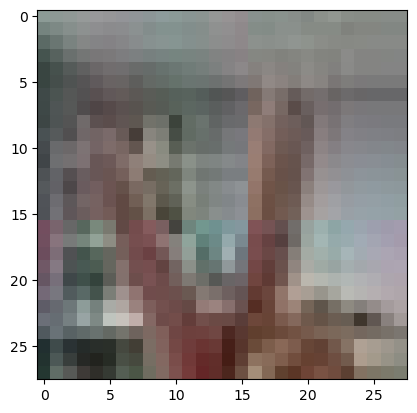

In [65]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [66]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))


model.summary()

c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 26, 26, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,819 (120.39 KB)

 Trainable params: 30,819 (120.39 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4196 - loss: 15.5812
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6302 - loss: 2.7770
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9698 - loss: 0.1118
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9697 - loss: 0.0919
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9983 - loss: 0.0037   
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0016
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0012   
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 7.6544e-04
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 2.4512e-04
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 2.3411e-04


In [68]:
image_dir_path = "../data/딥러닝 1일차/test/scissor"
resize_images(image_dir_path)

image_dir_path = "../data/딥러닝 1일차/test/rock"
resize_images(image_dir_path)

image_dir_path = "../data/딥러닝 1일차/test/paper"
resize_images(image_dir_path)

image_dir_path = "../data/딥러닝 1일차/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))


100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
학습 데이터 이미지 개수: 300
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [69]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - 38ms/step - accuracy: 0.3333 - loss: 28.2927
test_loss: 28.29271125793457 
test_accuracy: 0.3333333432674408
